ASSIGNMENT

From your knowledge on Python for Data analysis and Maths, you’ll be given a Dataset where you’ll be asked to draw inferences from using python and write a report on it.

DESCRIPTION

A digital lending company, which prides itself on its effective use of credit risk models to deliver profitable and high-impact loan alternatives. Its assessment approach is based on two main risk drivers of loan default prediction:. 1) willingness to pay and 2) ability to pay. Since not all customers payback, the company invests inexperienced data scientists to build robust models to effectively predict the odds of repayment.

The data scientist is to predict if a loan was good or bad, i.e. accurately predict binary outcome variable, where Good is 1 and Bad is 0.

But at the moment, you are not to build any model. All is to clean and process the data into something an algorithm can take in.

IMPORTING THE DATASETS

In [221]:
#importing the neccessary libraries for the data analysis

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
import scipy as sc

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

In [162]:
#reading and merging the datasets
filepaths = [r"C:\Users\hp\Desktop\SCA mentee\datasets\traindemographics.txt",
             r"C:\Users\hp\Desktop\SCA mentee\datasets\trainperf.txt", 
             r"C:\Users\hp\Desktop\SCA mentee\datasets\trainprevloans.txt"
]
df = pd.concat([pd.read_csv(d) for d in filepaths ])
df

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,systemloanid,...,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,closeddate,firstduedate,firstrepaiddate
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18178,8a858899538ddb8e0153a2b555421fc5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301611754.0,...,2016-04-16 13:36:34.000000,2016-04-16 12:36:28.000000,10000.0,13000.0,30.0,NaN,NaN,2016-05-14 00:04:52.000000,2016-05-16 00:00:00.000000,2016-05-13 18:05:07.000000
18179,8a858899538ddb8e0153a2b555421fc5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301761267.0,...,2016-11-18 14:26:07.000000,2016-11-18 13:25:51.000000,30000.0,34400.0,30.0,NaN,NaN,2016-12-13 16:08:57.000000,2016-12-19 00:00:00.000000,2016-12-13 15:53:48.000000
18180,8a858899538ddb8e0153a2b555421fc5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301631653.0,...,2016-06-12 15:30:56.000000,2016-06-12 14:30:50.000000,10000.0,13000.0,30.0,NaN,NaN,2016-07-09 15:39:00.000000,2016-07-12 00:00:00.000000,2016-07-09 15:23:56.000000
18181,8a858f0656b7820c0156c92ca3ba436f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301697691.0,...,2016-08-27 20:03:45.000000,2016-08-27 19:03:34.000000,10000.0,13000.0,30.0,NaN,NaN,2016-10-15 10:17:54.000000,2016-09-26 00:00:00.000000,2016-10-15 10:02:45.000000


EXPLORING AND FORMATING DATA TYPE



In [163]:
#checking the features of 
df.info()

print("\n", df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26897 entries, 0 to 18182
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  26897 non-null  object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
 9   systemloanid                22551 non-null  float64
 10  loannumber                  22551 non-null  float64
 11  approveddate                22551 non-null  object 
 12  creationdate                22551 non-null  object 
 13  loanamount                  225

In [164]:
#converting the datatype of date columns to datetime and creating new year, month & day columns

date_cols = ["birthdate", "approveddate", "creationdate", "closeddate", "firstduedate", "firstrepaiddate"]

#creating a datetime converter function
def convert_type(df, cols):
    
    timfmt = "%Y-%m-%d %H:%M:%S"
    
    for col in cols:
        df[col] = pd.to_datetime(df[col], format = timfmt, errors = 'coerce')
        df[col + "_d"] = df[col].dt.day
        df[col + "_m"] = df[col].dt.month
        df[col + "_y"] = df[col].dt.year

#calling the converter function
convert_type(df, date_cols)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26897 entries, 0 to 18182
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  26897 non-null  object        
 1   birthdate                   4346 non-null   datetime64[ns]
 2   bank_account_type           4346 non-null   object        
 3   longitude_gps               4346 non-null   float64       
 4   latitude_gps                4346 non-null   float64       
 5   bank_name_clients           4346 non-null   object        
 6   bank_branch_clients         51 non-null     object        
 7   employment_status_clients   3698 non-null   object        
 8   level_of_education_clients  587 non-null    object        
 9   systemloanid                22551 non-null  float64       
 10  loannumber                  22551 non-null  float64       
 11  approveddate                22551 non-null  datetime64

In [229]:
df

,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,loannumber,loanamount,totaldue,...,creationdate_y,closeddate_d,closeddate_m,closeddate_y,firstduedate_d,firstduedate_m,firstduedate_y,firstrepaiddate_d,firstrepaiddate_m,firstrepaiddate_y
0,Savings,-0.151397,-0.156046,GT Bank,OGBA,Permanent,Graduate,-0.371625,-0.618291,-0.567600,...,0.472552,0.018596,0.030731,0.429191,-0.054238,0.025790,0.425053,0.018863,0.033188,0.430830
1,Savings,-0.149207,0.316750,Sterling Bank,OGBA,Permanent,Graduate,-0.371625,-0.618291,-0.567600,...,0.472552,0.018596,0.030731,0.429191,-0.054238,0.025790,0.425053,0.018863,0.033188,0.430830
2,Savings,0.681804,-0.928646,Fidelity Bank,OGBA,Permanent,Graduate,-0.371625,-0.618291,-0.567600,...,0.472552,0.018596,0.030731,0.429191,-0.054238,0.025790,0.425053,0.018863,0.033188,0.430830
3,Savings,-0.136417,-0.064911,GT Bank,OGBA,Permanent,Graduate,-0.371625,-0.618291,-0.567600,...,0.472552,0.018596,0.030731,0.429191,-0.054238,0.025790,0.425053,0.018863,0.033188,0.430830
4,Savings,1.611942,4.199643,GT Bank,OGBA,Permanent,Graduate,-0.371625,-0.618291,-0.567600,...,0.472552,0.018596,0.030731,0.429191,-0.054238,0.025790,0.425053,0.018863,0.033188,0.430830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,Savings,-0.057298,-0.081394,GT Bank,OGBA,Permanent,Graduate,0.592117,1.565264,1.767713,...,-2.116090,-1.304282,-1.777951,0.429191,0.079896,-2.236663,0.425053,0.150954,-2.214211,0.430830
18179,Savings,-0.057298,-0.081394,GT Bank,OGBA,Permanent,Graduate,1.555859,1.565264,1.532220,...,-2.116090,-0.378267,2.743753,-2.329879,0.482300,2.740734,-2.352560,-0.377410,2.730067,-2.321017
18180,Savings,-0.057298,-0.081394,GT Bank,OGBA,Permanent,Graduate,-0.050378,-0.618291,-0.567600,...,-2.116090,-0.907418,0.482901,-2.329879,-0.456642,0.478280,-2.352560,-0.905774,0.482668,-2.321017
18181,Savings,-0.057298,-0.081394,GT Bank,OGBA,Permanent,Graduate,-1.014120,-0.618291,-0.567600,...,-2.116090,-0.113692,1.839412,-2.329879,1.421243,1.383262,-2.352560,-0.113228,1.831108,-2.321017


In [166]:
#Dropping initial date columns

df.drop(columns = date_cols, axis = 1, inplace = True) 

In [167]:
df

,customerid,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,systemloanid,loannumber,...,creationdate_y,closeddate_d,closeddate_m,closeddate_y,firstduedate_d,firstduedate_m,firstduedate_y,firstrepaiddate_d,firstrepaiddate_m,firstrepaiddate_y
0,8a858e135cb22031015cbafc76964ebd,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8a858e5b5bd99460015bdc95cd485634,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8a858e785acd3412015acd48f4920d04,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18178,8a858899538ddb8e0153a2b555421fc5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301611754.0,2.0,...,2016.0,14.0,5.0,2016.0,16.0,5.0,2016.0,13.0,5.0,2016.0
18179,8a858899538ddb8e0153a2b555421fc5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301761267.0,9.0,...,2016.0,13.0,12.0,2016.0,19.0,12.0,2016.0,13.0,12.0,2016.0
18180,8a858899538ddb8e0153a2b555421fc5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301631653.0,4.0,...,2016.0,9.0,7.0,2016.0,12.0,7.0,2016.0,9.0,7.0,2016.0
18181,8a858f0656b7820c0156c92ca3ba436f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301697691.0,1.0,...,2016.0,15.0,10.0,2016.0,26.0,9.0,2016.0,15.0,10.0,2016.0


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26897 entries, 0 to 18182
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  26897 non-null  object 
 1   bank_account_type           4346 non-null   object 
 2   longitude_gps               4346 non-null   float64
 3   latitude_gps                4346 non-null   float64
 4   bank_name_clients           4346 non-null   object 
 5   bank_branch_clients         51 non-null     object 
 6   employment_status_clients   3698 non-null   object 
 7   level_of_education_clients  587 non-null    object 
 8   systemloanid                22551 non-null  float64
 9   loannumber                  22551 non-null  float64
 10  loanamount                  22551 non-null  float64
 11  totaldue                    22551 non-null  float64
 12  termdays                    22551 non-null  float64
 13  referredby                  161

In [169]:
#dropping the id columns

df.drop(columns = ["customerid", "systemloanid"], axis = 1, inplace = True) 

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26897 entries, 0 to 18182
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   bank_account_type           4346 non-null   object 
 1   longitude_gps               4346 non-null   float64
 2   latitude_gps                4346 non-null   float64
 3   bank_name_clients           4346 non-null   object 
 4   bank_branch_clients         51 non-null     object 
 5   employment_status_clients   3698 non-null   object 
 6   level_of_education_clients  587 non-null    object 
 7   loannumber                  22551 non-null  float64
 8   loanamount                  22551 non-null  float64
 9   totaldue                    22551 non-null  float64
 10  termdays                    22551 non-null  float64
 11  referredby                  1613 non-null   object 
 12  good_bad_flag               4368 non-null   object 
 13  birthdate_d                 434

HANDLING MISSING VALUES

In [171]:
#confirming existence of missing values in dataset
df.isnull().sum()

bank_account_type             22551
longitude_gps                 22551
latitude_gps                  22551
bank_name_clients             22551
bank_branch_clients           26846
employment_status_clients     23199
level_of_education_clients    26310
loannumber                     4346
loanamount                     4346
totaldue                       4346
termdays                       4346
referredby                    25284
good_bad_flag                 22529
birthdate_d                   22551
birthdate_m                   22551
birthdate_y                   22551
approveddate_d                 4346
approveddate_m                 4346
approveddate_y                 4346
creationdate_d                 4346
creationdate_m                 4346
creationdate_y                 4346
closeddate_d                   8714
closeddate_m                   8714
closeddate_y                   8714
firstduedate_d                 8714
firstduedate_m                 8714
firstduedate_y              

In [172]:
#getting the dataframe columns
df_cols = df.columns
list_cols = list(df_cols)
list_cols.remove("good_bad_flag")
list_cols

['bank_account_type',
 'longitude_gps',
 'latitude_gps',
 'bank_name_clients',
 'bank_branch_clients',
 'employment_status_clients',
 'level_of_education_clients',
 'loannumber',
 'loanamount',
 'totaldue',
 'termdays',
 'referredby',
 'birthdate_d',
 'birthdate_m',
 'birthdate_y',
 'approveddate_d',
 'approveddate_m',
 'approveddate_y',
 'creationdate_d',
 'creationdate_m',
 'creationdate_y',
 'closeddate_d',
 'closeddate_m',
 'closeddate_y',
 'firstduedate_d',
 'firstduedate_m',
 'firstduedate_y',
 'firstrepaiddate_d',
 'firstrepaiddate_m',
 'firstrepaiddate_y']

In [173]:

#creating a function for filling missing values
def na_handler(df, cols):
    """This function handles all missing values.
    numeric columns will be filled with the median while categorical columns will be fill with mode"""
    
    for col in cols:
        
        if df[col].dtypes == "float64":
            df[col].replace(np.nan, df[col].median(), inplace=True)
            #normalizing the numerical columns using the z-score method
            df[col] = (df[col]-df[col].mean())/df[col].std()
            
        elif df[col].dtypes == "object":
            df[col].replace(np.nan, df[col].mode().values[0], inplace=True)

#replacing missing values
na_handler(df, list_cols)
            
df

,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,loannumber,loanamount,totaldue,...,creationdate_y,closeddate_d,closeddate_m,closeddate_y,firstduedate_d,firstduedate_m,firstduedate_y,firstrepaiddate_d,firstrepaiddate_m,firstrepaiddate_y
0,Savings,-0.151397,-0.156046,GT Bank,OGBA,Permanent,Graduate,-0.371625,-0.618291,-0.56760,...,0.472552,0.018596,0.030731,0.429191,-0.054238,0.025790,0.425053,0.018863,0.033188,0.430830
1,Savings,-0.149207,0.316750,Sterling Bank,OGBA,Permanent,Graduate,-0.371625,-0.618291,-0.56760,...,0.472552,0.018596,0.030731,0.429191,-0.054238,0.025790,0.425053,0.018863,0.033188,0.430830
2,Savings,0.681804,-0.928646,Fidelity Bank,OGBA,Permanent,Graduate,-0.371625,-0.618291,-0.56760,...,0.472552,0.018596,0.030731,0.429191,-0.054238,0.025790,0.425053,0.018863,0.033188,0.430830
3,Savings,-0.136417,-0.064911,GT Bank,OGBA,Permanent,Graduate,-0.371625,-0.618291,-0.56760,...,0.472552,0.018596,0.030731,0.429191,-0.054238,0.025790,0.425053,0.018863,0.033188,0.430830
4,Savings,1.611942,4.199643,GT Bank,OGBA,Permanent,Graduate,-0.371625,-0.618291,-0.56760,...,0.472552,0.018596,0.030731,0.429191,-0.054238,0.025790,0.425053,0.018863,0.033188,0.430830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18178,Savings,-0.057298,-0.081394,GT Bank,OGBA,Permanent,Graduate,-0.692873,-0.618291,-0.56760,...,-2.116090,-0.245979,-0.421440,-2.329879,0.079896,-0.426701,-2.352560,-0.377410,-0.416291,-2.321017
18179,Savings,-0.057298,-0.081394,GT Bank,OGBA,Permanent,Graduate,1.555859,1.565264,1.53222,...,-2.116090,-0.378267,2.743753,-2.329879,0.482300,2.740734,-2.352560,-0.377410,2.730067,-2.321017
18180,Savings,-0.057298,-0.081394,GT Bank,OGBA,Permanent,Graduate,-0.050378,-0.618291,-0.56760,...,-2.116090,-0.907418,0.482901,-2.329879,-0.456642,0.478280,-2.352560,-0.905774,0.482668,-2.321017
18181,Savings,-0.057298,-0.081394,GT Bank,OGBA,Permanent,Graduate,-1.014120,-0.618291,-0.56760,...,-2.116090,-0.113692,1.839412,-2.329879,1.421243,1.383262,-2.352560,-0.113228,1.831108,-2.321017


EXPLORATORY DATA ANALYSIS

In [187]:
#getting a statistical summary of the columns
print(df["good_bad_flag"].isnull().sum())
df.describe()


21121


,longitude_gps,latitude_gps,loannumber,loanamount,totaldue,termdays,birthdate_d,birthdate_m,birthdate_y,approveddate_d,...,creationdate_y,closeddate_d,closeddate_m,closeddate_y,firstduedate_d,firstduedate_m,firstduedate_y,firstrepaiddate_d,firstrepaiddate_m,firstrepaiddate_y
count,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,...,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000,23449.000000
mean,0.008105,0.011506,0.036780,0.024242,0.022541,0.010172,-0.003087,0.009249,-0.008345,-0.002289,...,-0.040893,0.003866,-0.005849,-0.036400,0.005710,-0.005625,-0.036204,0.004054,-0.006203,-0.036711
std,1.070580,1.069457,1.021304,1.019389,1.019202,1.030301,1.069250,1.068240,1.069614,0.984286,...,1.032253,1.027642,1.042076,1.033377,1.027446,1.042493,1.033674,1.027761,1.042406,1.033466
min,-41.887705,-32.484699,-1.014120,-1.382535,-1.504670,-1.237161,-4.268795,-3.720717,-9.574921,-1.835419,...,-2.116090,-1.965720,-2.230121,-2.329879,-1.932123,-2.236663,-2.352560,-1.962503,-2.214211,-2.321017
25%,-0.057298,-0.081394,-0.692873,-0.618291,-0.567600,-1.237161,0.017434,-0.064594,0.061413,-0.714511,...,0.472552,-0.642843,-0.421440,0.429191,-0.724912,-0.426701,0.425053,-0.641592,-0.416291,0.430830
50%,-0.057298,-0.081394,-0.371625,-0.618291,-0.567600,0.230484,0.017434,-0.064594,0.061413,0.032760,...,0.472552,0.018596,0.030731,0.429191,-0.054238,0.025790,0.425053,0.018863,0.033188,0.430830
75%,-0.057298,-0.081394,0.592117,0.473486,0.492122,0.230484,0.017434,-0.064594,0.061413,0.655487,...,0.472552,0.680035,0.482901,0.429191,0.616435,0.478280,0.425053,0.679318,0.482668,0.430830
max,50.622455,51.620688,7.338311,4.840595,4.838946,6.101063,4.303663,4.322753,4.478066,1.900940,...,0.472552,2.002913,2.743753,0.429191,2.091916,2.740734,0.425053,2.000229,2.730067,0.430830


In [203]:
#checking the value counts for categorical variables

cat_var = ["bank_account_type", "bank_name_clients", "bank_branch_clients", "employment_status_clients", 
                                "level_of_education_clients", "good_bad_flag"]

for item in cat_var:
    print(f"the value count for {item} is:\n", df[item].value_counts(), "\n")

the value count for bank_account_type is:
 Savings    22529
Other        864
Current       56
Name: bank_account_type, dtype: int64 

the value count for bank_name_clients is:
 GT Bank               20709
First Bank              588
Access Bank             431
UBA                     351
Zenith Bank             301
Diamond Bank            282
EcoBank                 150
Stanbic IBTC            144
FCMB                    121
Fidelity Bank           103
Skye Bank               101
Sterling Bank            54
Wema Bank                28
Union Bank               23
Heritage Bank            22
Keystone Bank            19
Standard Chartered       15
Unity Bank                7
Name: bank_name_clients, dtype: int64 

the value count for bank_branch_clients is:
 OGBA                                                              23401
HEAD OFFICE                                                           2
AJOSE ADEOGUN                                                         2
OREGUN            

In [175]:
#Checking for presence of duplicate data in our dataset
duplicate_df = df.duplicated()
print("sum of duplicates =", duplicate_df.sum(), "\n")
df[duplicate_df]

sum of duplicates = 3448 



,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,loannumber,loanamount,totaldue,...,creationdate_y,closeddate_d,closeddate_m,closeddate_y,firstduedate_d,firstduedate_m,firstduedate_y,firstrepaiddate_d,firstrepaiddate_m,firstrepaiddate_y
159,Savings,-0.139940,0.390124,GT Bank,OGBA,Permanent,Graduate,-0.371625,-0.618291,-0.567600,...,0.472552,0.018596,0.030731,0.429191,-0.054238,0.025790,0.425053,0.018863,0.033188,0.430830
517,Other,0.007679,0.358326,First Bank,OGBA,Permanent,Secondary,-0.371625,-0.618291,-0.567600,...,0.472552,0.018596,0.030731,0.429191,-0.054238,0.025790,0.425053,0.018863,0.033188,0.430830
776,Savings,0.060483,0.075514,Stanbic IBTC,OGBA,Permanent,Graduate,-0.371625,-0.618291,-0.567600,...,0.472552,0.018596,0.030731,0.429191,-0.054238,0.025790,0.425053,0.018863,0.033188,0.430830
1015,Savings,1.295507,1.859247,UBA,OGBA,Permanent,Graduate,-0.371625,-0.618291,-0.567600,...,0.472552,0.018596,0.030731,0.429191,-0.054238,0.025790,0.425053,0.018863,0.033188,0.430830
1090,Savings,-0.134990,-0.181087,Sterling Bank,OGBA,Permanent,Graduate,-0.371625,-0.618291,-0.567600,...,0.472552,0.018596,0.030731,0.429191,-0.054238,0.025790,0.425053,0.018863,0.033188,0.430830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18136,Savings,-0.057298,-0.081394,GT Bank,OGBA,Permanent,Graduate,-0.692873,-0.618291,-0.567600,...,-2.116090,-1.171994,2.291583,-2.329879,-1.127315,2.288243,-2.352560,-1.169956,2.280587,-2.321017
18140,Savings,-0.057298,-0.081394,GT Bank,OGBA,Permanent,Graduate,-0.371625,-0.618291,-0.567600,...,0.472552,-1.568857,0.482901,0.429191,-1.395585,0.478280,0.425053,-1.566230,0.482668,0.430830
18150,Savings,-0.057298,-0.081394,GT Bank,OGBA,Permanent,Graduate,-0.692873,-0.618291,-0.567600,...,0.472552,1.606049,0.482901,0.429191,1.689512,0.478280,0.425053,1.603956,0.482668,0.430830
18151,Savings,-0.057298,-0.081394,GT Bank,OGBA,Permanent,Graduate,-0.050378,-0.618291,-0.714784,...,0.472552,-0.245979,-1.777951,0.429191,0.079896,-1.784173,0.425053,-0.245319,-1.764731,0.430830


In [176]:
#dropping duplicate data
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23449 entries, 0 to 18182
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   bank_account_type           23449 non-null  object 
 1   longitude_gps               23449 non-null  float64
 2   latitude_gps                23449 non-null  float64
 3   bank_name_clients           23449 non-null  object 
 4   bank_branch_clients         23449 non-null  object 
 5   employment_status_clients   23449 non-null  object 
 6   level_of_education_clients  23449 non-null  object 
 7   loannumber                  23449 non-null  float64
 8   loanamount                  23449 non-null  float64
 9   totaldue                    23449 non-null  float64
 10  termdays                    23449 non-null  float64
 11  referredby                  23449 non-null  object 
 12  good_bad_flag               2328 non-null   object 
 13  birthdate_d                 234

BIVARIATE ANALYSIS OF DATA

We can visualize the datasets in pairs to see if there is any form of relationship between them


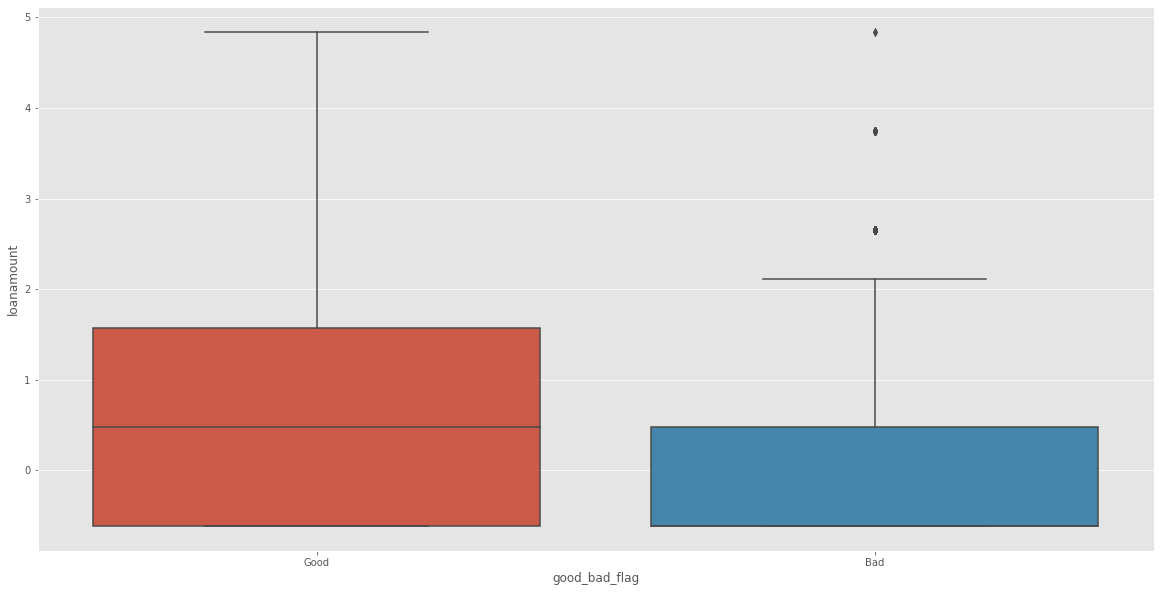

In [226]:
sns.boxplot(y = "loanamount", x = "good_bad_flag", data = df)

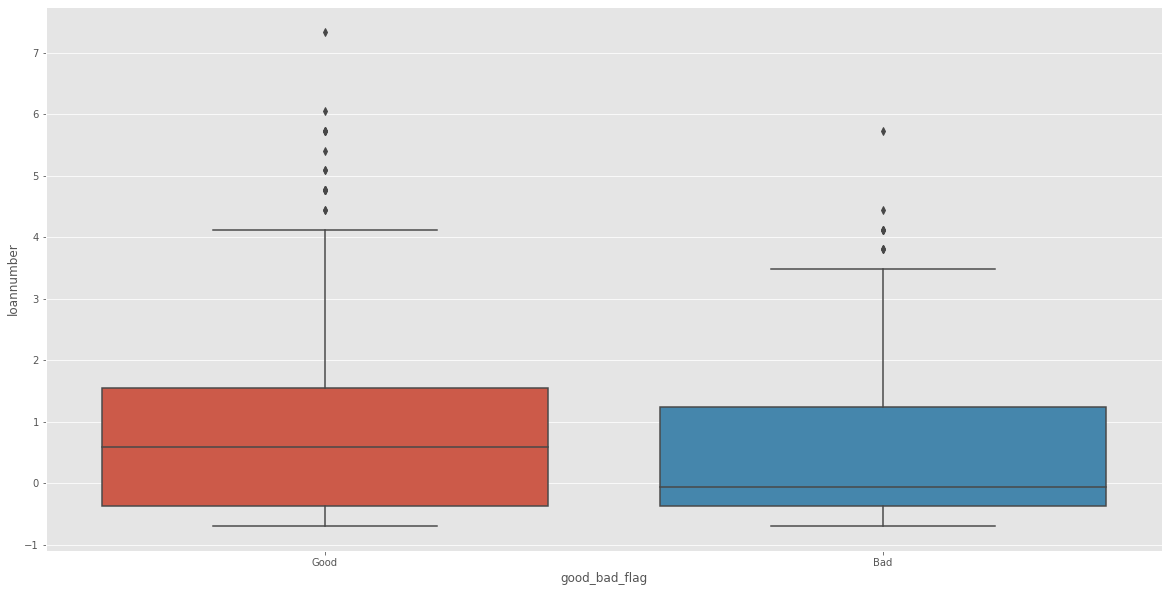

In [225]:
sns.boxplot(y = "loannumber", x = "good_bad_flag", data = df)

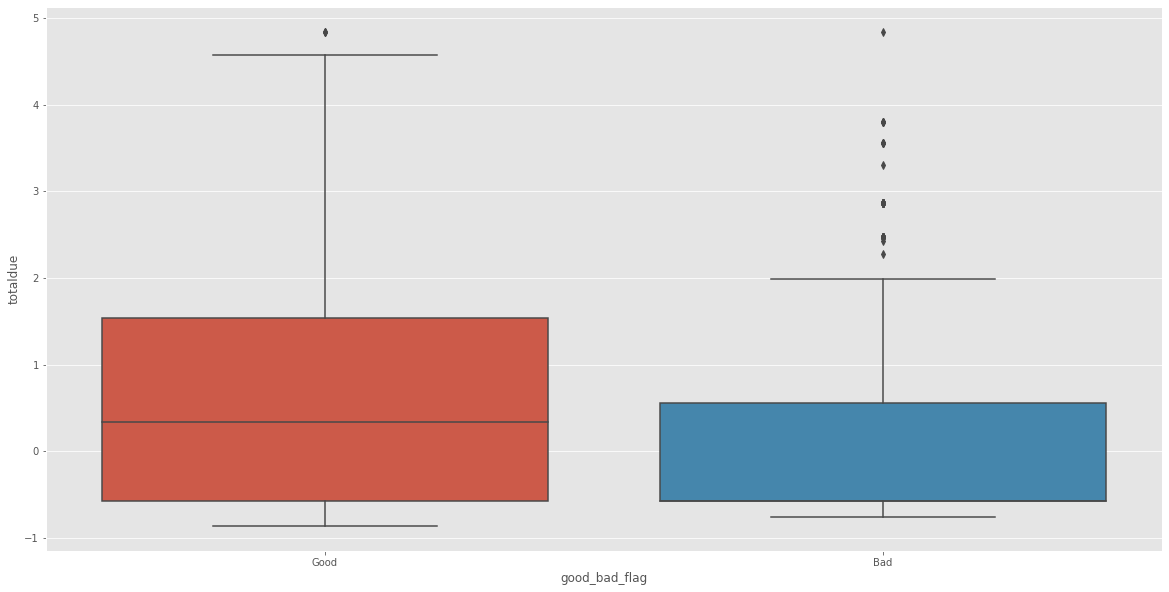

In [224]:
sns.boxplot(y = "totaldue", x = "good_bad_flag", data = df)

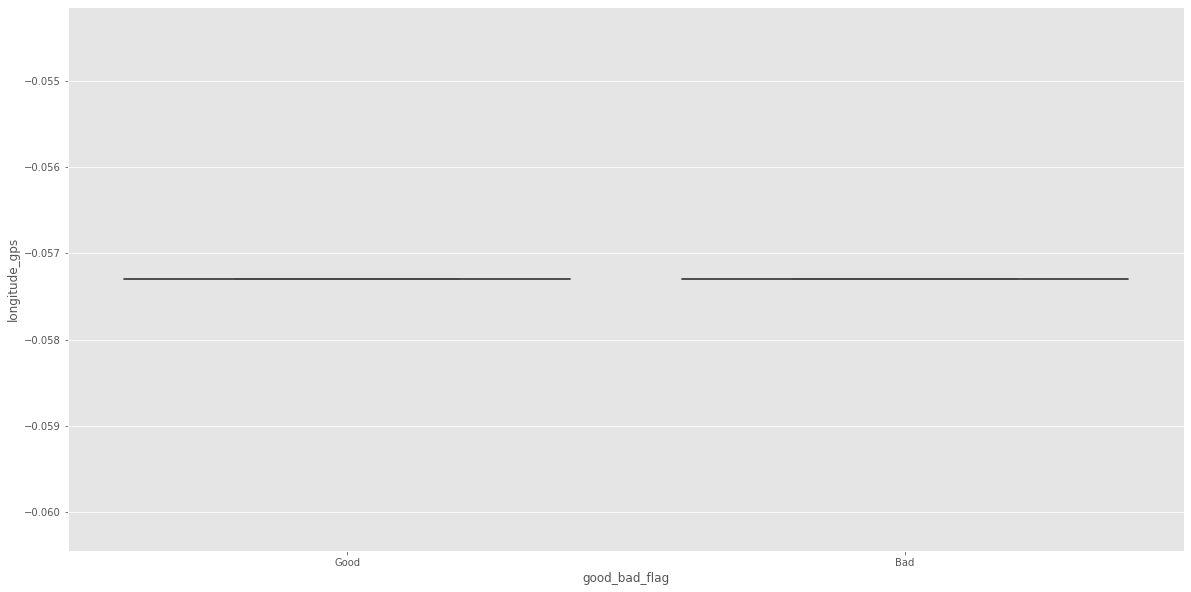

In [223]:
sns.boxplot(y = "longitude_gps", x = "good_bad_flag", data = df)

Text(0, 0.5, 'loanamount')

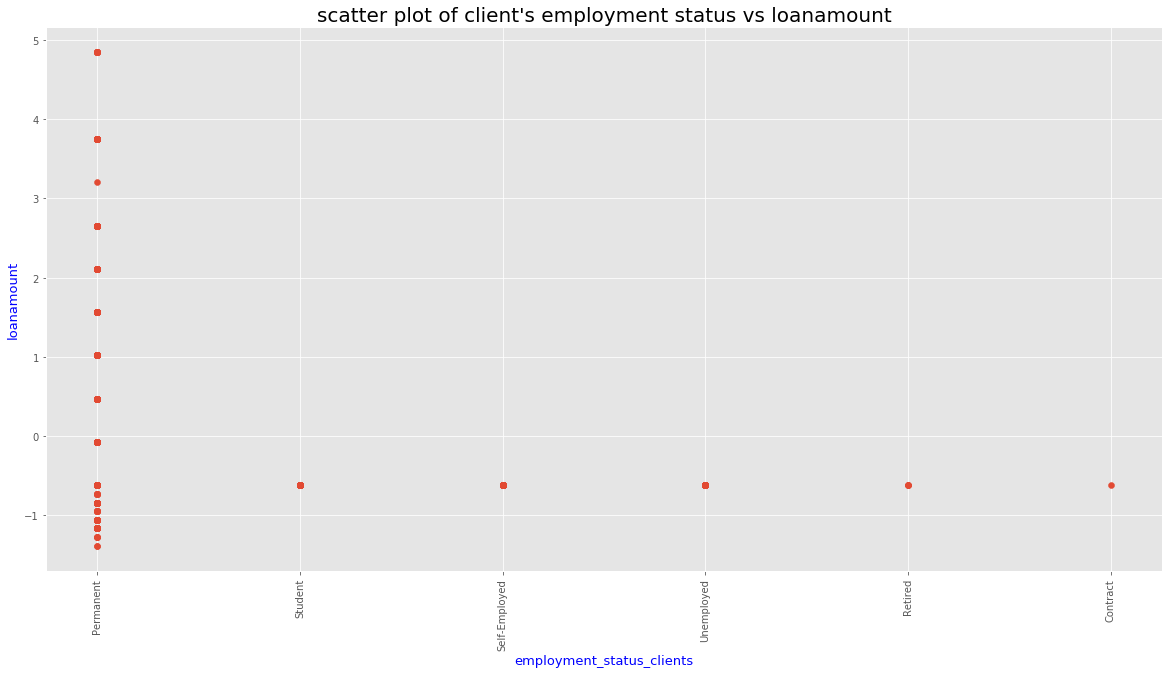

In [228]:
x = df["employment_status_clients"]
y = df["loanamount"]
plt.scatter(x, y)
plt.title("scatter plot of client's employment status vs loanamount", fontsize = 20)
plt.xticks(rotation = 90)
plt.xlabel("employment_status_clients", fontsize=13,color='blue')
plt.ylabel("loanamount", fontsize=13,color='blue')

ENCODING CATEGORICAL VARIABLES

In [197]:
cat_var = ["bank_account_type", "bank_name_clients", "bank_branch_clients", "employment_status_clients", 
                                "level_of_education_clients", "good_bad_flag"]
cat_dummies  = pd.get_dummies(df[cat_var],
                             columns = cat_var, prefix = ["account", "name", "branch", "status", "education", 'flag'] )

cat_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23449 entries, 0 to 18182
Data columns (total 78 columns):
 #   Column                                                                 Non-Null Count  Dtype
---  ------                                                                 --------------  -----
 0   account_Current                                                        23449 non-null  uint8
 1   account_Other                                                          23449 non-null  uint8
 2   account_Savings                                                        23449 non-null  uint8
 3   name_Access Bank                                                       23449 non-null  uint8
 4   name_Diamond Bank                                                      23449 non-null  uint8
 5   name_EcoBank                                                           23449 non-null  uint8
 6   name_FCMB                                                              23449 non-null  uint8
 7   name